In [1]:
# # In case it is necessary to run in colaboratory
# !python colab_module_imports.py

In [2]:
from revllm import PreprocessQAndA
from revllm import AnalyzeQAndA 
from revllm import VisualizeQAndA

# Question and Answer, or "qanda"
* DistilBERT base model
* fine-tuned on SQuAD, a standard question answering dataset

## The user provides:

* A question
* A context, from which the model will extract the answer
* A ground truth answer, which is what the model will try to predict

In [3]:
question = "What is important to us?"
context = "It is important to us to include, empower and support humans of all kinds."
ground_truth = "to include, empower and support humans of all kinds"

# We use the same model as the huggingface baseline for qanda
model = 'distilbert-base-uncased-distilled-squad'

In [4]:
#Define the objects
preprocessor = PreprocessQAndA(model)
analyzer = AnalyzeQAndA(model,preprocessor)
visualizer = VisualizeQAndA(model,preprocessor)

In [5]:
# Pass the question, context and ground truth to the preprocessor
preprocessor.preprocess(question, context, ground_truth)

## .predict() method
* Two predictions are made:
    * A predicted start to the answer (token number)
    * A predicted end to the answer (token number)
* The predicted answer as shown is the text between the predicted start and end tokens

In [6]:
# Run the model
analyzer.predict()

        Question:  What is important to us?
Predicted Answer:  to include , em ##power and support humans of all kinds
   Actual Answer:  to include, empower and support humans of all kinds


## "lig" methods
* "lig" is a reference to the internal method used, "layer integrated gradients"

### .lig_color_map() method
* Since the prediction consists of a start and end token, for each one here is shown:
    * The predicted vs actual token
    * The entire text is printed with question and context concatenated.  
        * Above the text for each token, its importance to model's prediction ("attribution score") is shown in color.  
        * A legend is included.

In [7]:
analyzer.lig_color_map()

 Visualizations For Start Position 


 Visualizations For End Position 


### .lig_top_k_tokens() method
* Prints the entire list of tokens
* For each of the start and end token predictions, prints the top k attributed tokens, for a choice of k.

In [8]:
analyzer.lig_top_k_tokens(k=5)

Full token list: ['[CLS](0)', 'what(1)', 'is(2)', 'important(3)', 'to(4)', 'us(5)', '?(6)', '[SEP](7)', 'it(8)', 'is(9)', 'important(10)', 'to(11)', 'us(12)', 'to(13)', 'include(14)', ',(15)', 'em(16)', '##power(17)', 'and(18)', 'support(19)', 'humans(20)', 'of(21)', 'all(22)', 'kinds(23)', '.(24)', '[SEP](25)']
Top 5 attributed embeddings for start position:   Word(Index), Attribution
0             it (8), 0.41
1               ? (6), 0.4
2             to (4), 0.33
3             us (5), 0.27
4             is (2), 0.24
Top 5 attributed embeddings for end position:   Word(Index), Attribution
0             us (5), 0.43
1            us (12), 0.34
2              ? (6), 0.34
3             to (4), 0.27
4       include (14), 0.23


## "lc" methods
* "lc" is a reference to the internal method used, "layer conductance"

### .lc_visualize_layers() method
* Creates 2 plots: one for the predicting start token, one for the predicting end token
* For each token, a color tile representing the attribution score is given for each layer of the model (there are 6 layers in distilbert).

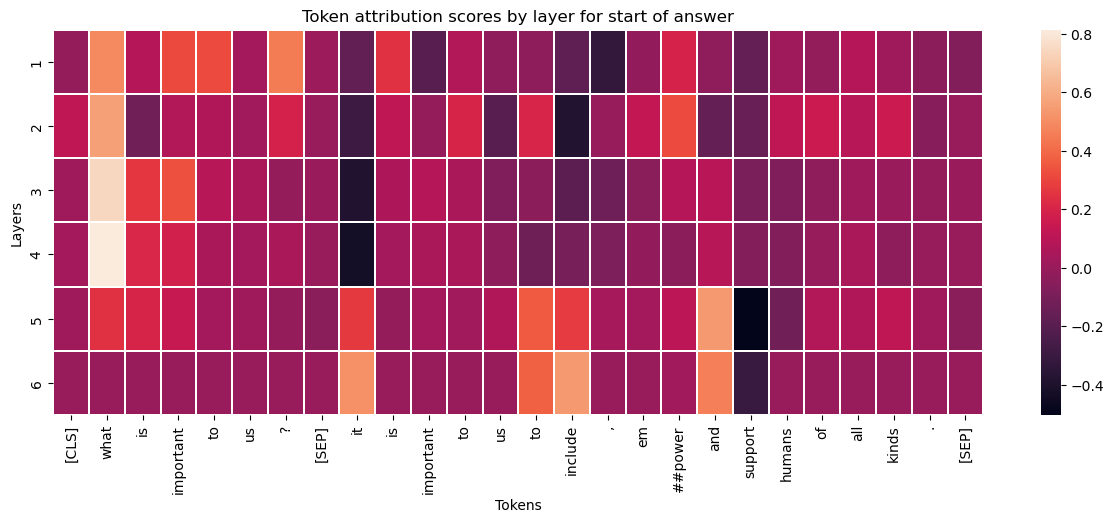

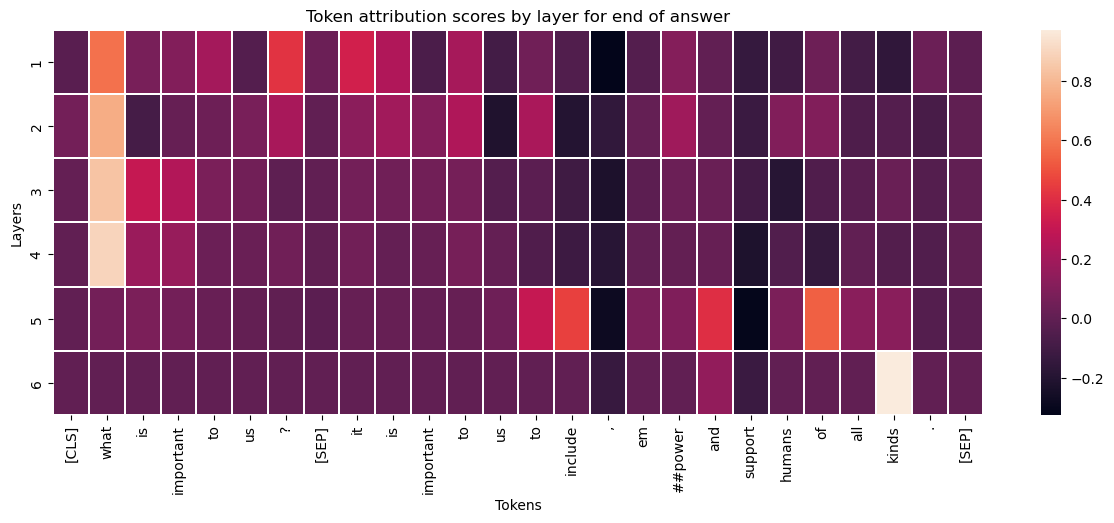

In [9]:
visualizer.lc_visualize_layers()

### .lc_visualize_token() method
* For a choice of token (for example "name"), produces some plots.
* This method is unfinished, an explanation to come.

In [10]:
token_to_analyze = 'humans'

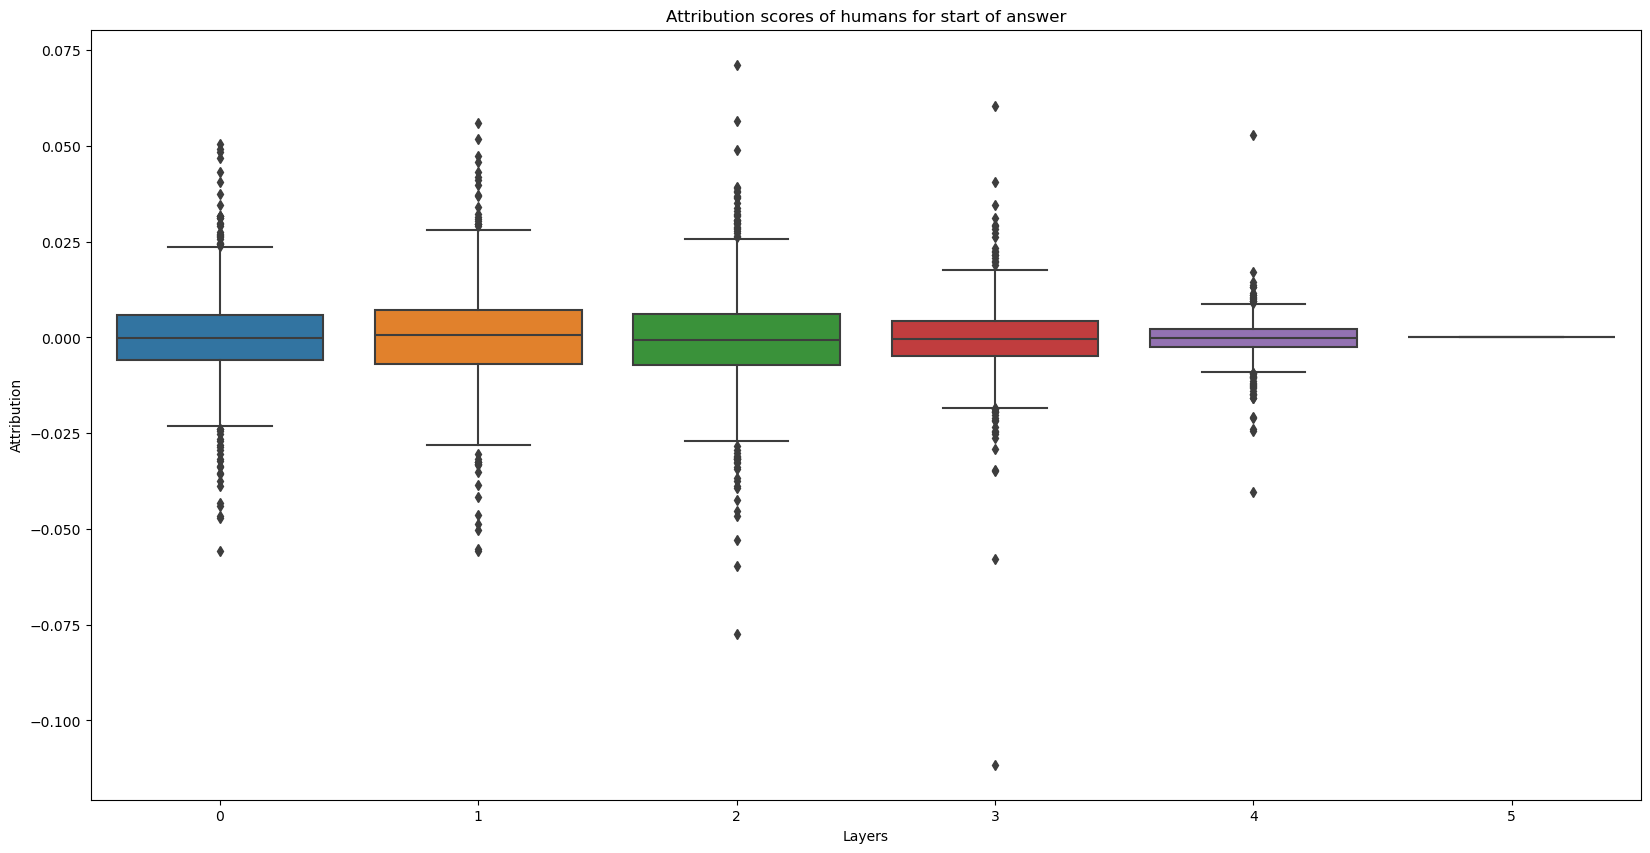

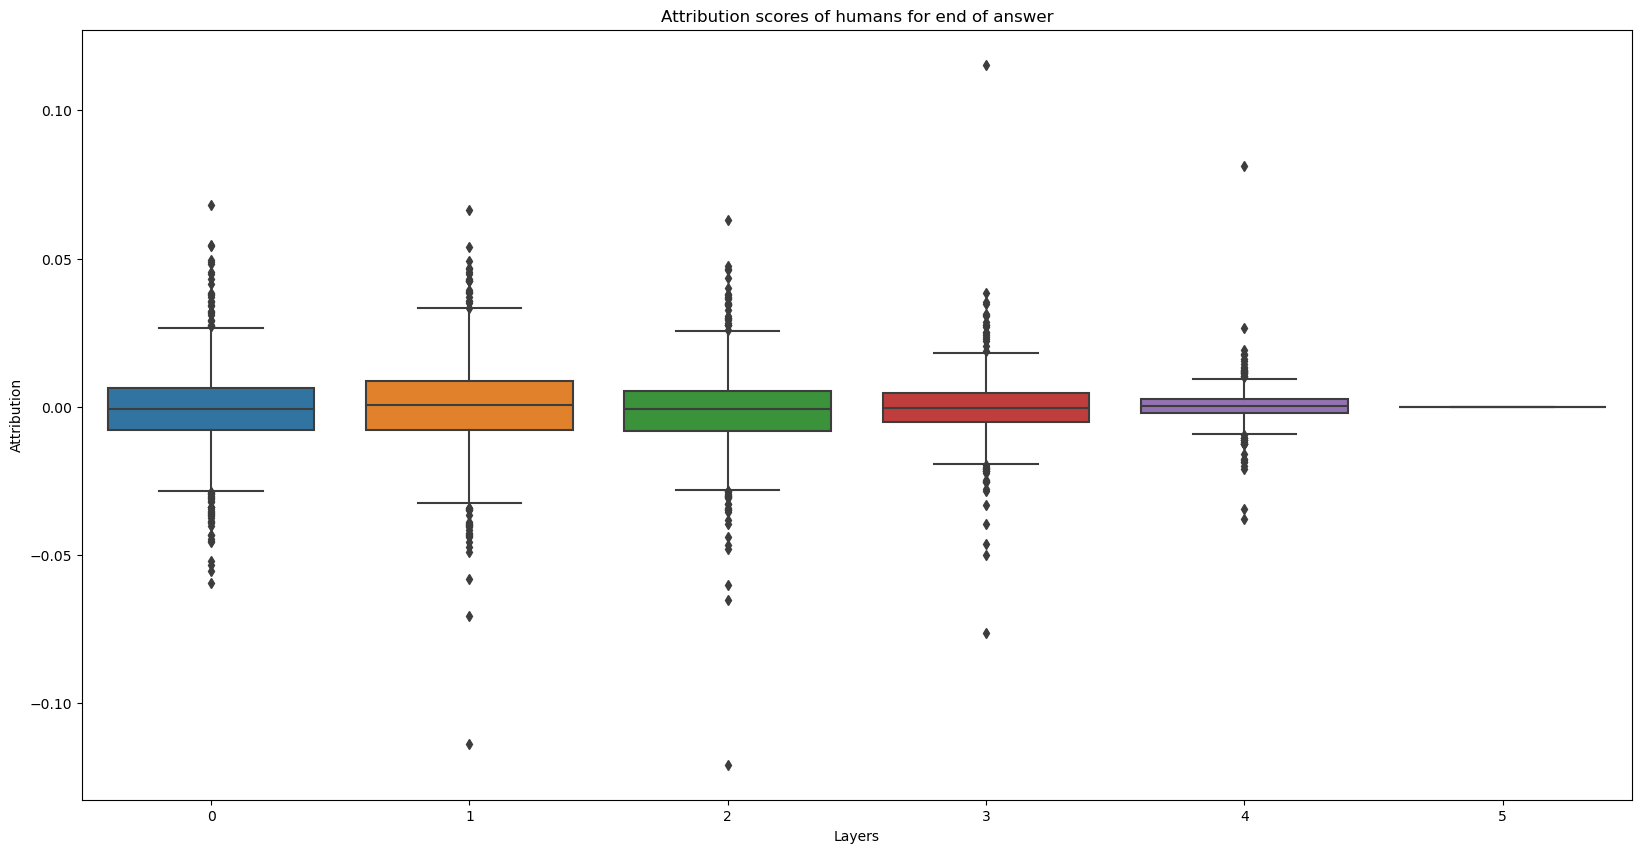

In [11]:
visualizer.lc_visualize_token_boxes(token_to_analyze)

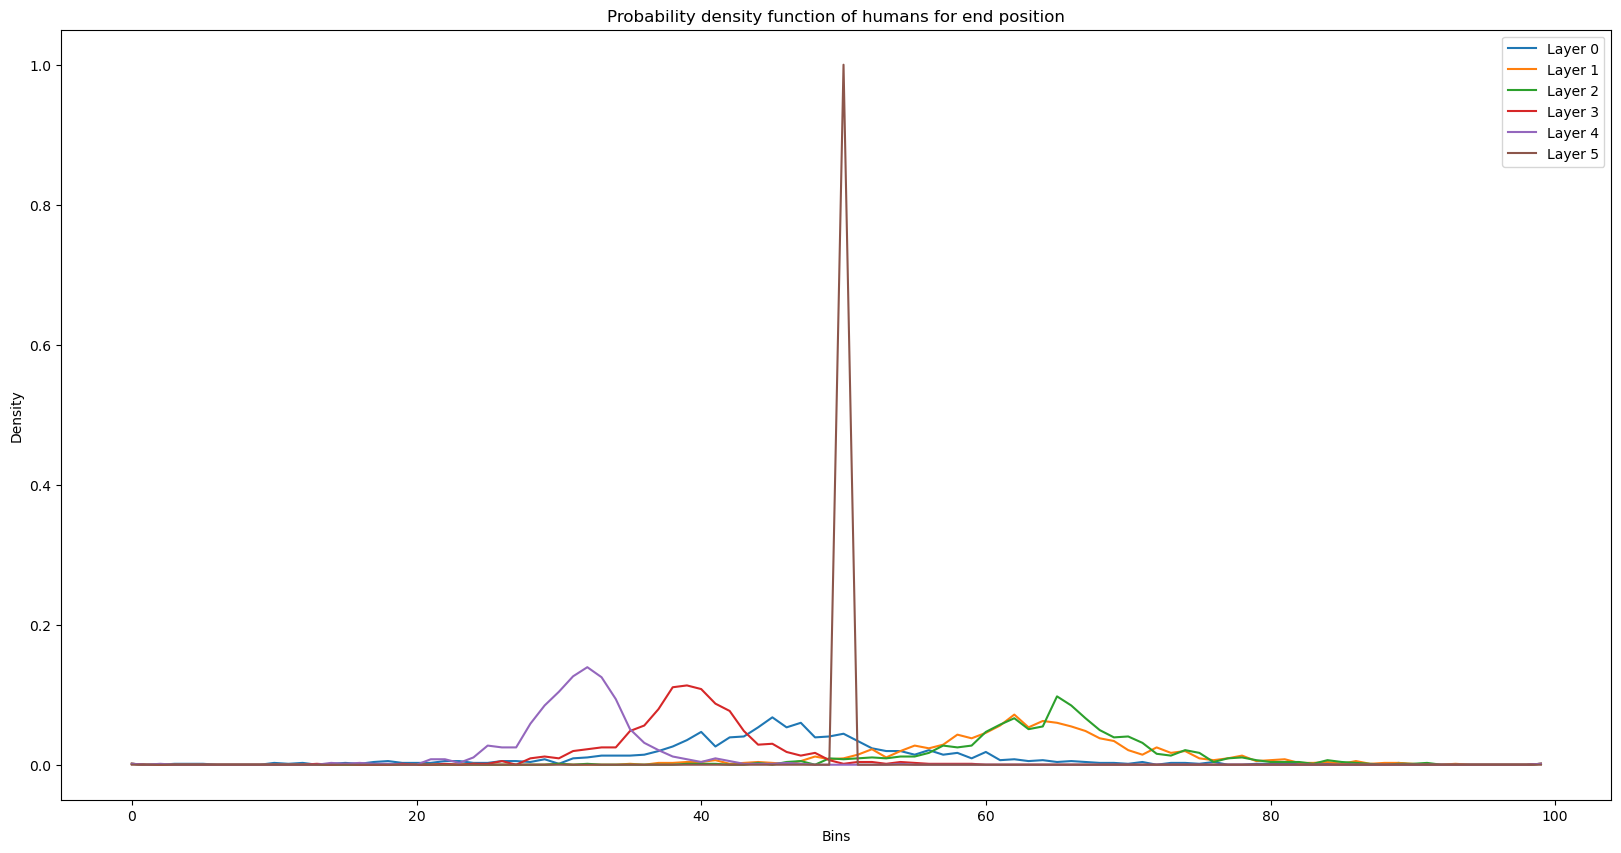

In [12]:
visualizer.lc_visualize_token_pdfs(token_to_analyze)

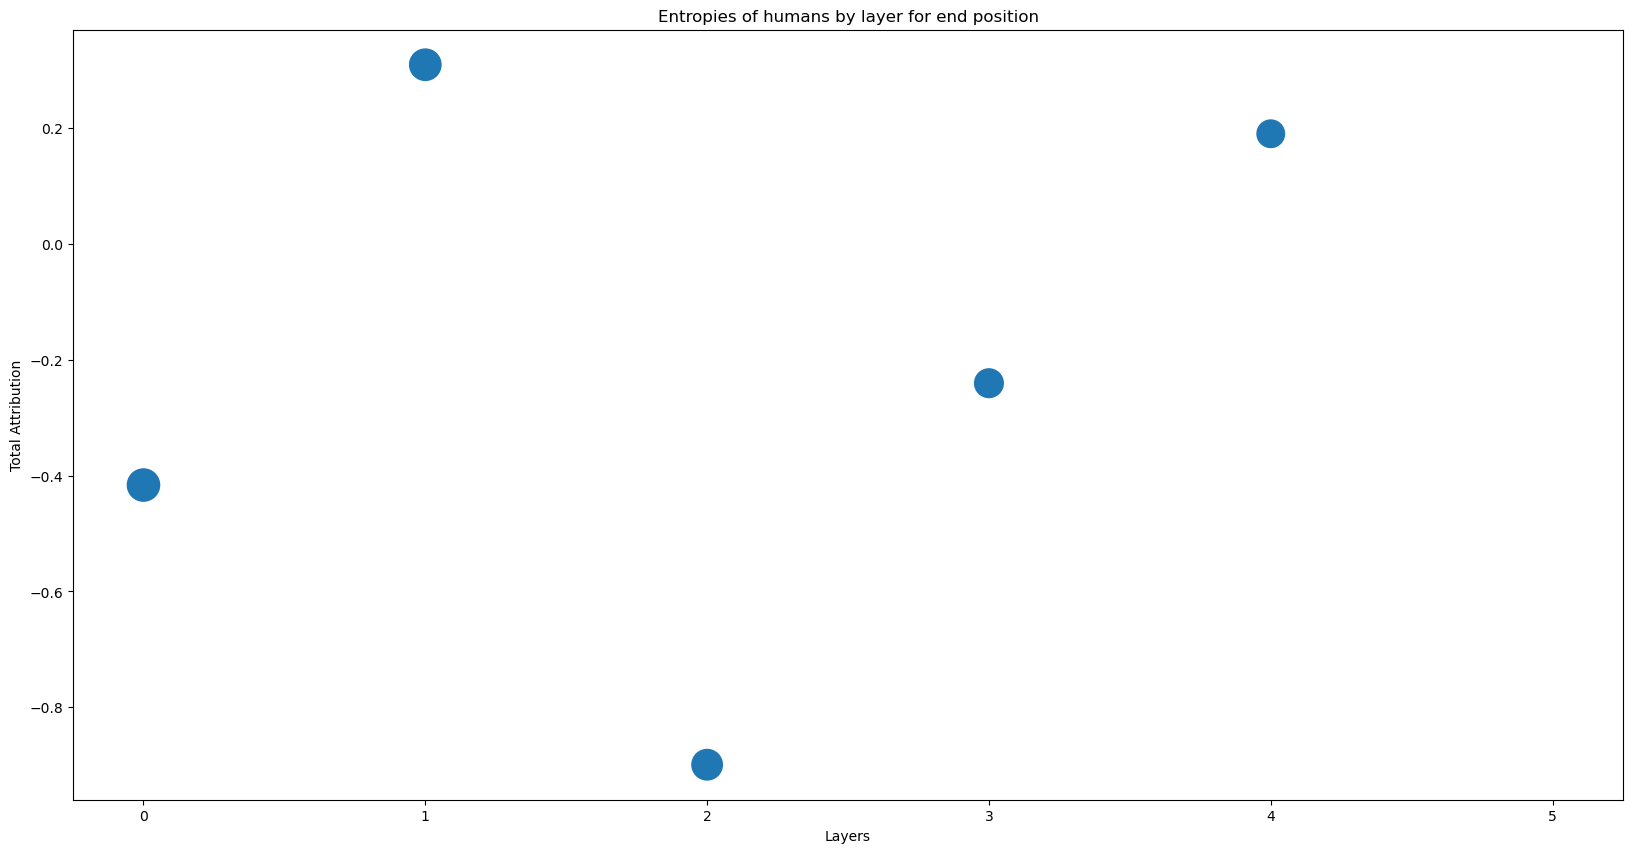

In [13]:
visualizer.lc_visualize_token_entropies(token_to_analyze)

## Bertviz
* Displays attention for every head and layer

In [14]:
visualizer.BertViz()

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased-distilled-squad and are newly initialized: ['classifier.weight', 'pre_classifier.bias', 'classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>